In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "FABIA"
tool_suffix = "Fabia"
n_runs = 10

parameters = (("alpha",[0.001,0.005,0.01,0.05,0.1,0.5]),
              ("spl",[0,0.25,0.5,0.75,1,1.5,2]),
              ("spz",[0,0.25,0.5,0.75,1,1.5,2]))

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/J/img"
tsv_outdir = out_dir + "/J/"

In [4]:
for g in g_sizes:
    for s in s_sizes:
        params_folder = "alpha=0.05.spl=0.spz=0.5"
        pred_bic_fname = pred_bic_fname_prefix+str(g)+","+str(s)+pred_bic_fname_suffix
        bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
        bics = parse_biclust(bic_file_path,n_runs=n_runs)[0]
        print(g,"x",s,len(bics))

5 x 10 10
5 x 20 10
5 x 50 10
5 x 100 10
10 x 10 10
10 x 20 10
10 x 50 10
10 x 100 10
20 x 10 10
20 x 20 10
20 x 50 10
20 x 100 10
50 x 10 10
50 x 20 10
50 x 50 10
50 x 100 10
100 x 10 10
100 x 20 10
100 x 50 10
100 x 100 10


In [5]:
true_bic_fname = true_bic_fname_prefix+str(20)+","+str(100)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)

bic_file_path = '../simulated_datasets/results/FABIA/alpha=0.05.spl=0.spz=0.5/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.Fabia.biclust_results.txt'
runs = parse_biclust(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, np.mean(F1_per_bic(true_bics, pred_bics)) )
    

0 0.976388125545388
1 0.976388125545388
2 0.976388125545388
3 0.976388125545388
4 0.976388125545388
5 0.976388125545388
6 0.976388125545388
7 0.976388125545388
8 0.976388125545388
9 0.976388125545388


In [6]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)

results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

File not found ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.Fabia.biclust_results.txt
Failed to parse ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.Fabia.biclust_results.txt
File not found ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.Fabia.biclust_results.txt
Failed to parse ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.Fabia.biclust_results.txt
File not found ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.Fabia.biclust_results.txt
Failed to parse ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.Fabia.biclust_results.txt
File not found ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.25/simulated.N=10.Mu=2.0.GxP=10,10.overlap=T

Failed to parse ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.75/simulated.N=10.Mu=2.0.GxP=50,20.overlap=TT.Fabia.biclust_results.txt
File not found ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.75/simulated.N=10.Mu=2.0.GxP=50,50.overlap=TT.Fabia.biclust_results.txt
Failed to parse ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.75/simulated.N=10.Mu=2.0.GxP=50,50.overlap=TT.Fabia.biclust_results.txt
File not found ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.75/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.Fabia.biclust_results.txt
Failed to parse ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.75/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.Fabia.biclust_results.txt
File not found ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.75/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.Fabia.biclust_results.txt
Failed to parse ../simulated_datasets/results/FABIA/alpha=0.001.spl=0.spz=0.75/simulated.N=10.Mu=2.0.GxP=100,10.

In [7]:
results["Geometric_Mean"] = np.sqrt(results["Relevance"]*results["Recovery"])
results

,n_genes,n_samples,alpha,spz,spl,n_biclusters,Relevance,Recovery,Geometric_Mean
0,5,10,0.001,0.0,0.0,10,0.001910,0.002182,0.002041
1,5,10,0.001,0.0,0.0,10,0.001603,0.001764,0.001682
2,5,10,0.001,0.0,0.0,10,0.002261,0.002259,0.002260
3,5,10,0.001,0.0,0.0,10,0.001796,0.001924,0.001859
4,5,10,0.001,0.0,0.0,10,0.001593,0.001710,0.001651
5,5,10,0.001,0.0,0.0,10,0.001532,0.001639,0.001584
6,5,10,0.001,0.0,0.0,10,0.002183,0.002460,0.002317
7,5,10,0.001,0.0,0.0,10,0.001561,0.001840,0.001695
8,5,10,0.001,0.0,0.0,10,0.001693,0.001951,0.001817
9,5,10,0.001,0.0,0.0,10,0.001583,0.001555,0.001569


Total combinations: 272
[(0.05, 0.5, 0.75) (0.05, 0.5, 1.0) (0.05, 0.25, 0.0) (0.05, 0.75, 1.0)
 (0.05, 0.25, 0.25) (0.05, 0.5, 0.5) (0.05, 0.25, 0.75) (0.05, 0.25, 0.5)
 (0.05, 0.5, 0.25) (0.05, 0.25, 1.0) (0.05, 0.5, 0.0) (0.05, 0.75, 0.75)
 (0.1, 0.0, 0.75) (0.05, 1.0, 1.0) (0.1, 0.0, 0.5) (0.1, 0.25, 1.0)
 (0.01, 1.5, 0.0) (0.05, 0.0, 0.0) (0.1, 0.0, 0.25) (0.01, 1.5, 0.75)]
Top 20 paramter combinations


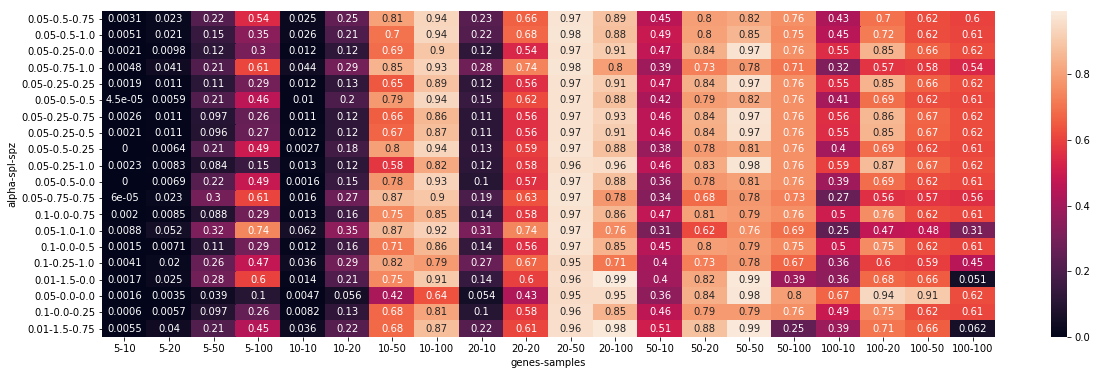

In [13]:
heatmap = plot_performance_heatmap(results,params,top=20,what="Geometric_Mean",
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [14]:
parameters

(('alpha', [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]),
 ('spl', [0, 0.25, 0.5, 0.75, 1, 1.5, 2]),
 ('spz', [0, 0.25, 0.5, 0.75, 1, 1.5, 2]))

In [15]:
default_params = (0.01,0,0.5)

In [16]:
r = get_opt_params(results, params, heatmap, default_params=default_params, what="Geometric_Mean", more_n_smaples = 0)
r

All 54400 runs considered

with Optimal parameters (Geometric_Mean --> max):
Geometric_Mean : 0.537259578427798
(0.05, 0.5, 0.75)
0.0	0.02	0.22	0.54	0.03	0.25	0.81	0.94	0.23	0.66	0.97	0.89	0.45	0.8	0.82	0.76	0.43	0.7	0.62	0.6
	alpha=('Geometric_Mean', 'mean');
	spl=('Geometric_Mean', 'std');
	spz=('Geometric_Mean', 'count');
	Max. avg. Geometric_Mean: 0.537 ± 0.311
	Max. avg. Relevance: 0.536 ± 0.312
	Max. avg. Recovery: 0.539 ± 0.31
	Max. avg. n_biclusters: 10.165 ± 0.434
With Default parameters:
(0.01, 0, 0.5)
0.0	0.0	0.02	0.05	0.0	0.02	0.18	0.4	0.02	0.22	0.8	0.66	0.23	0.75	0.98	0.49	0.63	0.97	0.97	0.25
	alpha=0.01;
	spl=0;
	spz=0.5;
	avg. Geometric_Mean: 0.382 ± 0.363
	avg. Relevance: 0.38 ± 0.364
	avg. Recovery: 0.383 ± 0.362
	avg. n_biclusters: 10.0 ± 0.0


,,,Geometric_Mean,Relevance,Recovery,n_biclusters
,,,mean,mean,mean,mean
alpha,spl,spz,,,,
0.05,0.5,0.75,0.53726,0.535774,0.538837,10.165
